# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

# Cas de tests, Modele linéaire

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [2]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.77923024 0.5227573  0.89185786]


In [3]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
], dtype=ctypes.c_float)
Y = np.array([
      1,
      -1,
      -1
], dtype=ctypes.c_float)

print(type(X))
print(Y)

<class 'numpy.ndarray'>
[ 1. -1. -1.]


In [4]:
X_plot = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y_plot = np.array([
      1,
      -1,
      -1
])

In [5]:
arr_size = len(X)

In [6]:
dimension = len(X[0])

In [7]:
learning_rate = ctypes.c_float(0.001)

In [8]:
epoch = 1000000

In [9]:
X_flat = X.flatten()

In [10]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [11]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [12]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [13]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[ 0.47723377 -0.22924295 -0.01414141]
<class 'ctypes.wintypes.LP_c_float'>


In [14]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [15]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(100* min(X_plot[:, 0]),100* max(X_plot[:, 0])) :
  for x2 in range(100*min(X_plot[:, 1]), 100*max(X_plot[:, 1])) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

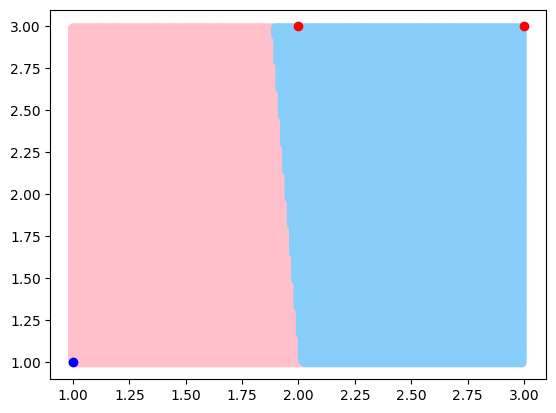

<Figure size 640x480 with 0 Axes>

In [16]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

In [17]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [18]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.19952416 0.7611414  0.06879938]


In [19]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])], dtype=ctypes.c_float)
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0], dtype=ctypes.c_float)

X_plot = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y_plot = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

In [20]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [21]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [22]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [23]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [24]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[ 0.29952437  0.01699028 -0.16973397]
<class 'ctypes.wintypes.LP_c_float'>


In [25]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [26]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(100 , 300) :
  for x2 in range(100 , 300) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

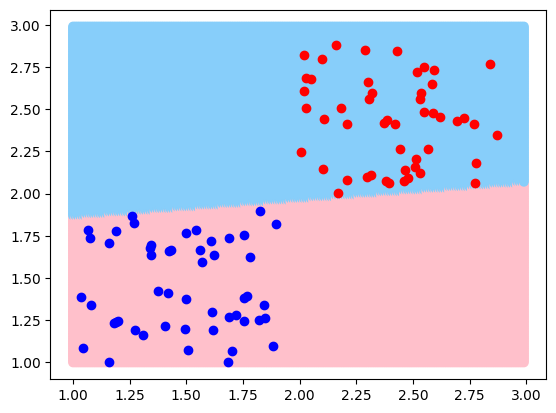

<Figure size 640x480 with 0 Axes>

In [27]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

In [28]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [29]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.9617152 0.4469385 0.8159851]


In [30]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]], dtype= ctypes.c_float)
Y = np.array([1, 1, -1, -1], dtype= ctypes.c_float)

X_plot = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y_plot = np.array([1, 1, -1, -1])

In [31]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [32]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [33]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [34]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [35]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[ 0.00172048 -0.00306203  0.00198846]
<class 'ctypes.wintypes.LP_c_float'>


In [36]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [37]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(0 , 100) :
  for x2 in range(0 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

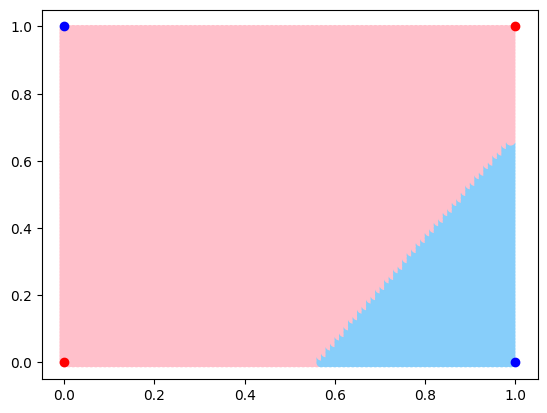

<Figure size 640x480 with 0 Axes>

In [38]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

In [39]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [40]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.24964821 0.4694972  0.18534899]


In [41]:
X = np.random.random((500, 2)) * 2.0 - 1.0
X = np.array(X, dtype= ctypes.c_float)
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])
Y = np.array(Y, dtype= ctypes.c_float)

X_plot = np.random.random((500, 2)) * 2.0 - 1.0
Y_plot = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

In [42]:
print(X)
print(Y)

[[ 5.24294734e-01 -4.08396870e-01]
 [ 3.21583360e-01  8.83104503e-01]
 [-2.18933761e-01  8.05828810e-01]
 [ 1.08010456e-01 -9.39930528e-02]
 [-4.25735652e-01 -2.15274379e-01]
 [-5.02957582e-01 -9.22687411e-01]
 [-8.80790830e-01  2.50962645e-01]
 [ 6.87895179e-01 -3.32322747e-01]
 [ 5.32802343e-01 -9.87606466e-01]
 [ 4.19245511e-01  4.28475380e-01]
 [-5.41565455e-02  5.51002145e-01]
 [-3.79399508e-01  6.19877815e-01]
 [ 7.03602970e-01 -1.66804910e-01]
 [-7.68565297e-01  9.04770792e-01]
 [ 6.77388668e-01  8.95861924e-01]
 [-8.58132780e-01  4.35739070e-01]
 [ 5.64341843e-01 -1.47309616e-01]
 [ 6.63218737e-01 -3.39361042e-01]
 [-8.08726907e-01  6.34629607e-01]
 [ 7.81606376e-01  5.53746641e-01]
 [ 2.00229079e-01 -1.80856586e-01]
 [-8.99225354e-01  1.12959847e-01]
 [-5.81352450e-02 -8.43611717e-01]
 [ 5.36773622e-01  8.24592650e-01]
 [ 2.92037606e-01  2.86925167e-01]
 [-5.51669657e-01  5.47473907e-01]
 [-3.09025168e-01 -4.05315638e-01]
 [ 3.21835577e-02  7.36621737e-01]
 [ 9.21904385e-01  3

In [43]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [44]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [45]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [46]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [47]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[-0.00235194 -0.0019848  -0.00084812]
<class 'ctypes.wintypes.LP_c_float'>


In [48]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [49]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

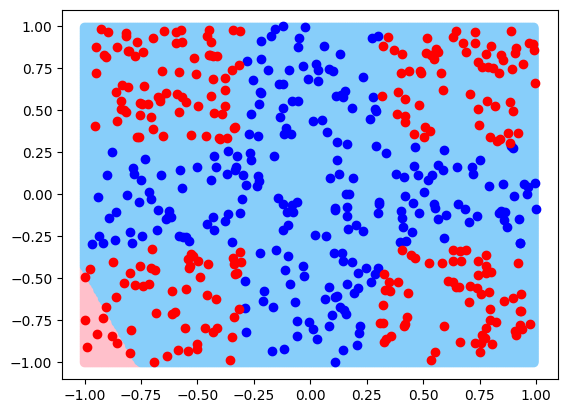

<Figure size 640x480 with 0 Axes>

In [50]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

In [51]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [61]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.9266579 0.5264684 0.863109 ]


In [62]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

Y_1 = [1 if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 0 for p in X]
Y_2 = [1 if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 0 for p in X]
Y_3 = [1 if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 0 for p in X]


X = np.array(X, dtype=ctypes.c_float)
Y_1 = np.array(Y_1, dtype=ctypes.c_float)
Y_2 = np.array(Y_2, dtype=ctypes.c_float)
Y_3 = np.array(Y_3, dtype=ctypes.c_float)

X_plot = np.random.random((500, 2)) * 2.0 - 1.0
Y_plot = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [0, 0, 0]for p in X_plot])

X_plot = X_plot[[not np.all(arr == [0, 0, 0]) for arr in Y_plot]]
Y_plot = Y_plot[[not np.all(arr == [0, 0, 0]) for arr in Y_plot]]

In [63]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [64]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [65]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_1_to_predict = (ctypes.c_float * len(Y_1))(*Y_1)
y_1_to_predict_ptr = ctypes.cast(y_1_to_predict, LP_c_float)

LP_c_float = ctypes.POINTER(ctypes.c_float)
y_2_to_predict = (ctypes.c_float * len(Y_2))(*Y_2)
y_2_to_predict_ptr = ctypes.cast(y_2_to_predict, LP_c_float)

LP_c_float = ctypes.POINTER(ctypes.c_float)
y_3_to_predict = (ctypes.c_float * len(Y_3))(*Y_3)
y_3_to_predict_ptr = ctypes.cast(y_3_to_predict, LP_c_float)

In [66]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training_restype = ctypes.POINTER(ctypes.c_float)

In [67]:
print(type(w_array_ptr))
print(type(y_1_to_predict_ptr))
print(type(x_to_predict_ptr))
print(type(arr_size))
print(type(dimension))
print(type(learning_rate))
print(type(epoch))

<class 'ctypes.wintypes.LP_c_float'>
<class 'ctypes.wintypes.LP_c_float'>
<class 'ctypes.wintypes.LP_c_float'>
<class 'int'>
<class 'int'>
<class 'ctypes.c_float'>
<class 'int'>


In [68]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_1_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_1 = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model_1)
print(type(linear_model_training_ptr))

-1020022064
<class 'int'>


In [60]:
print(type(w_array_ptr))
print(type(y_1_to_predict_ptr))
print(type(x_to_predict_ptr))
print(type(arr_size))
print(type(dimension))
print(type(learning_rate))
print(type(epoch))

<class 'ctypes.wintypes.LP_c_float'>
<class 'ctypes.wintypes.LP_c_float'>
<class 'ctypes.wintypes.LP_c_float'>
<class 'int'>
<class 'int'>
<class 'ctypes.c_float'>
<class 'int'>


In [ ]:
w_array_ptr = my_lib.generate_random_w(dimension)
w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))
linear_model_training_ptr_2 = my_lib.linear_model_training(
    w_array,  # pointeur vers le résultat du vecteur W random
    y_2_to_predict,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_2 = np.ctypeslib.as_array(
    linear_model_training_ptr_2, ((dimension + 1),)
)
print(trained_linear_model_2)
print(type(linear_model_training_ptr_2))

In [4]:
print(X)

[[-0.65830046  0.49325362]
 [-0.32316357  0.369188  ]
 [ 0.9682845  -0.66753227]
 [ 0.7328385  -0.16892165]
 [-0.32976398  0.05528286]
 [ 0.6788458  -0.674251  ]
 [ 0.98073334 -0.22099482]
 [-0.44010127 -0.7497357 ]
 [ 0.7305739  -0.13536686]
 [-0.53302217 -0.7211303 ]
 [-0.77151835  0.6417255 ]
 [ 0.48888645 -0.04368049]
 [-0.6887377  -0.14310935]
 [ 0.6607649   0.7252065 ]
 [ 0.58615977 -0.3614234 ]
 [-0.30190015  0.7269409 ]
 [ 0.75136405  0.8283048 ]
 [ 0.38870364  0.6510039 ]
 [ 0.78699106  0.3652396 ]
 [-0.44821146  0.9721233 ]
 [-0.6367694  -0.6461271 ]
 [ 0.6260202   0.8308028 ]
 [ 0.8284559  -0.86640596]
 [ 0.35857567  0.03432909]
 [ 0.73011446 -0.22374825]
 [ 0.22790839  0.40727058]
 [-0.10677968  0.74144644]
 [-0.32152155  0.8539428 ]
 [-0.7893408   0.58583856]
 [ 0.960185   -0.63435394]
 [ 0.03815125  0.16122521]
 [-0.611132   -0.2892645 ]
 [-0.6832456  -0.562166  ]
 [-0.8369755  -0.94398457]
 [ 0.5131418   0.21231869]
 [-0.89203304 -0.8740545 ]
 [ 0.19056553  0.5046733 ]
 

In [6]:
print(Y)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [7]:
arr_size = len(X)
dimension = 2
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [8]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [9]:
Y_flat = Y.flatten()

In [10]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [11]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [12]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[ 0.00022795 -0.00073191 -0.00019612]
<class 'ctypes.wintypes.LP_c_float'>


In [11]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [13]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

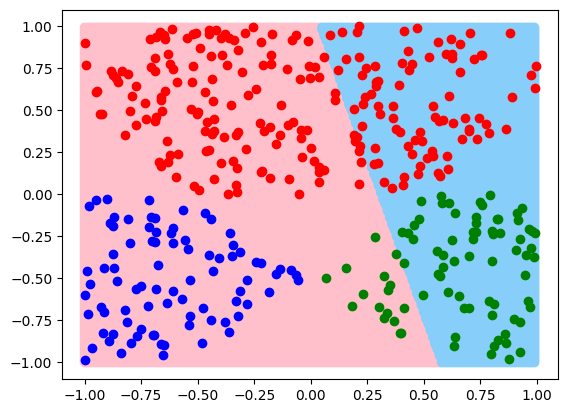

<Figure size 640x480 with 0 Axes>

In [14]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [14]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [ ]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

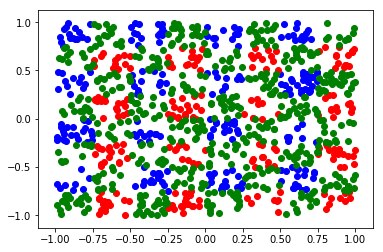

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

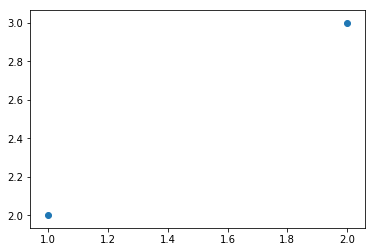

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

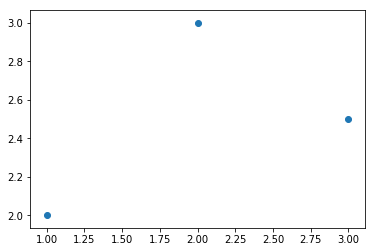

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

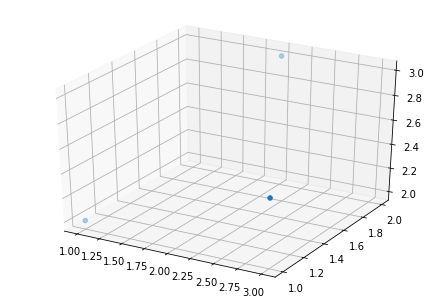

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

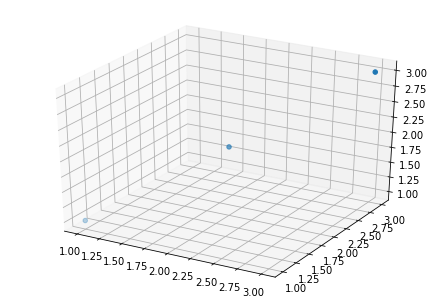

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [ ]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

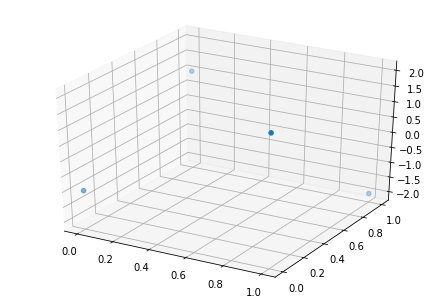

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()